# The Nearest Neighbors Algorithm #
<a href="https://www.youtube.com/watch?v=UqYde-LULfs"><img align="left" src="KNN.png" style="width: 360px" /></a>
The picture shows labeled, two-dimensional, datapoints. There are three kinds of datapoints: "a", "o", and "c". "a"s and "o"s form two groupings. However, a more interesting question would be: is "c" similar to the "a"s or to the "o"s? Assessing the identity of "o" by means of similarity with its neighbors is a way to solve this problem. It can be as simple as: whatever point draws the shortest line possible to "c" must have the same identity as "c".

This notebook will guide you through:

        * The K Nearest Neighbors Algorithm

        * An introduction to the Julia Language

        * Cross validation and hypterparameter search


What do you think? Is this the best solution?

What would happen if we were to asses using not just a single neighbor, but more?

Would two neighbors be a good number? Why?

What about three?

Would more or less neighbors be better?

<img align="left" src="http://cs231n.github.io/assets/cvplot.png" style="width: 360px" />
This plot, from a popular Stanford image recognition class ([cs231n](http://cs231n.github.io)) shows how the number of neighbors selected affects accuracy of a KNN model for image classification.

Now, let's build a Nearest Neighbors model from scratch.

The first step is to generate fake data that we can easily tell apart. Let's stick to two-dimensional data. In the cell below, generate random data using the `rand` functon in julia. Scale half of the datapoints to contain values between `0`and `0.75` (give these the label `0`), and the other half to contain values between `0.25` and `1` (give these the label `1`). Define general parameters `N`, `D`, `C`, to be the total number of data points, the dimensionality of each data point (or the number of features), and the number of classes, respectively. In the end you should have an matrix called `data`, of size `[N,(D+1)]`, where the last column contains the labels for each datapoint contained in each row. 

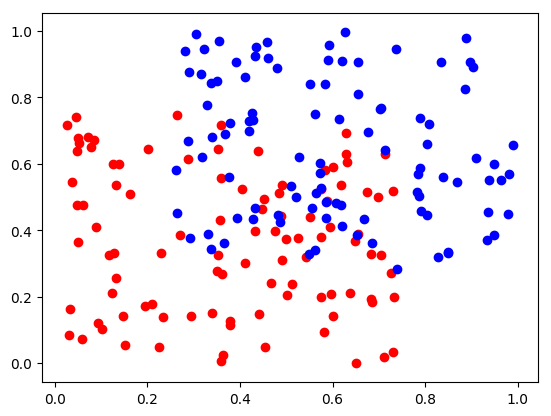

PyObject <matplotlib.collections.PathCollection object at 0x7fa45abccd10>

In [133]:
# this should generate a plot of your datapoints
using PyPlot
scatter(data[1:floor(Int,N/2),1],data[1:floor(Int,N/2),2],color="red")
scatter(data[floor(Int,N/2)+1:N,1],data[floor(Int,N/2)+1:N,2],color="blue")

The next step is to prepare the data to train and assess the model. Preparation of the data usually consists of at least one step: Random separation of the datapoints into training (~80% of the data), validation (~10%), and test sets (~10%). Why is this necessary?

* Bellow, shuffle the `data` array using the `shuffle` function. 
* Then separate your data intro training, validation, and test sets, keeping datapoints and labels in separate variables: 
    * Store the datapoints in the variables `x_tr`, `x_vl`, `x_ts`, and the labels in the variables `y_tr`, `y_vl`, `y_ts`. 
    * Make sure that variables with datapoints are shaped properly, for example, the `x_tr` array must be of size `[N_tr,D]`, indicating that the number of training examples `N_tr` corresponds to the number of rows, and dimensionality `D` corresponds to the number of columns. 
    * Do the same for the variables storing the labels, for example, the `y_tr` array must be of size `[N_tr,1]`, indicating that the number of training examples `N_tr` corresponds to the number of rows, and only one column is needed to store the labels.
    * Hint: the `reshape` function might be helpfull.

In [135]:
# Let's build the Nearest Neighbor model

# The first step is to declare in a variable K the number of neighbors we will be using
K = 3;

# Now we have to train the model. How do we do this? Which subset of the dataset do we use and how?

In [136]:
# Next we assess the model. How do we do this? Which subset of the dataset do we use and how?

using StatsBase

# Iterate over all datapoints used to assess the model
N_vl = size(x_vl)[1]
for i=1:N_vl
    
    # calculate the L1 norm between each point that you used to train the model
    # and each point that you use to validate the model. In pseudocode this will 
    # look at lot like:
    # sum(abs(a) - abs(b))
    # where a and b have the same number of columns (or features), but they may
    # have a different number of rows (why?)
    # This step is very easy, but make sure you completely understand everything 
    # you have to do, specially keeping track of the shape of arrays so that 
    # operations are plausible. The reshape function will be very helpful.
    # [your code here:]


    # now we need to use the L1 norm we just calculated to determine which 
    # datapoints used to train the model are closer to the datapoints used 
    # to assess the model. Use the sortperm function to obtain the indices
    # of the top K training datapoints closest to the point you are assessing
    # the model with.
    # [your code here:]


    # now use the indices you found before to index your array of training
    # labels and determine the "identity" of the top neighbors.
    # [your code here:]
    KNNs = 
    
    # have the neighbors vote
    hist = fit(Histogram,reshape(KNNs,size(KNNs)[1],))
    predicted_label = hist.edges[1][sortperm(hist.weights,rev=true)[1]]
    
    print("\n The predicted label for the datapoint is:")
    print(predicted_label)
    print("\n and the real label was: ")
    print(y_vl[i])
    
end




 The predicted label for the datapoint is:0.0
 and the real label was: 0.0
 The predicted label for the datapoint is:1.0
 and the real label was: 0.0
 The predicted label for the datapoint is:0.0
 and the real label was: 0.0
 The predicted label for the datapoint is:1.0
 and the real label was: 1.0
 The predicted label for the datapoint is:0.0
 and the real label was: 1.0
 The predicted label for the datapoint is:1.0
 and the real label was: 0.0
 The predicted label for the datapoint is:1.0
 and the real label was: 1.0
 The predicted label for the datapoint is:1.0
 and the real label was: 1.0
 The predicted label for the datapoint is:0.0
 and the real label was: 1.0
 The predicted label for the datapoint is:0.0
 and the real label was: 0.0
 The predicted label for the datapoint is:1.0
 and the real label was: 1.0
 The predicted label for the datapoint is:1.0
 and the real label was: 1.0
 The predicted label for the datapoint is:1.0
 and the real label was: 1.0
 The predicted label for

Now, using the code you wrote above, modify it so that it generates a plot where the x axis (in the range from 1 to 100) is determined by the number of neighbors used, and the y axis shows the accuracy of the model as a function of the number of neighbors used. This way we will be able to identify the "best" value for the tunable hyperparameter in this exercise, which is the number of K neighbors.

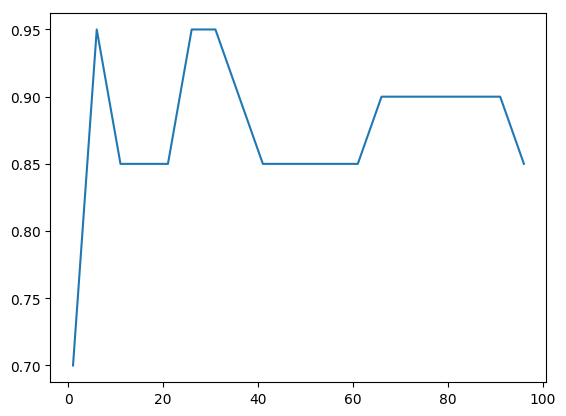

Which number of K seems to be the best choice? Why would this be the case?

Repeat the procedure but now with the new dataset provided below. Do you expect similar results? Why?

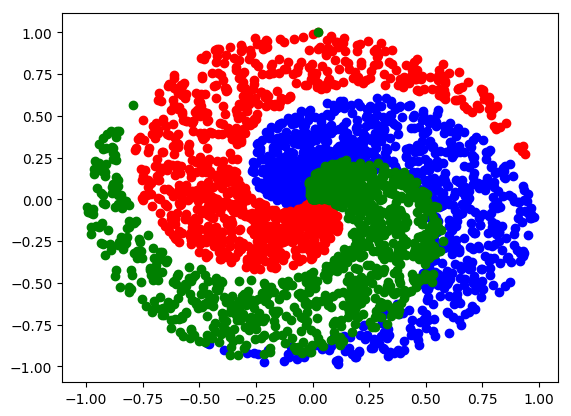

In [147]:
# data generation modified from http://cs231n.github.io/neural-networks-case-study/

N = 1000;D = 2;K = 3; # number of classes
X = zeros(N*K,D)
y = zeros(N*K)
for j=1:K
  ix = (N*(j-1)+1):(N*(j))
    r = linspace(0,1,N) # radius
  t = linspace((j*4),((j+1)*4),N) + rand(N)*2
    X[ix,:] = [reshape(r.*sin(t),size(r.*sin(t))[1],1) reshape(r.*cos(t),size(r.*cos(t))[1],1)]
  y[ix] = j
end

scatter(X[1:sum(y.==1),1],X[1:sum(y.==1),2],color="blue")
scatter(X[sum(y.==1)+1:sum(y.==1)+1+sum(y.==2),1],X[sum(y.==1)+1:sum(y.==1)+1+sum(y.==2),2],color="red")
scatter(X[end-sum(y.==3):end,1],X[end-sum(y.==3):end,2],color="green")

data = [X y]

Summarize with a small group of classmates what you have learned in this notebook and be prepared to share with the class.

Extra things to do: 
* modify the program above to use the L2 norm instead of the L1 norm
* implement k-fold cross validation instead of simple cross validation